In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [414]:
df=pd.read_csv("RTA Dataset.csv")

In [415]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [417]:
print(df['Accident_severity'].isna().sum())

0


In [418]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [419]:
df.drop(columns={'Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality','Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity','Fitness_of_casuality'},inplace=True)

In [420]:
a=pd.to_datetime(df['Time'],format='%H:%M:%S',errors='coerce')
df['Hours']=a.dt.hour
df['Mins']=a.dt.minute

In [421]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity,Hours,Mins
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,...,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury,1,6


In [422]:
h=df[['Hours','Mins']]

In [423]:
h.head()

,Hours,Mins
0,17,2
1,17,2
2,17,2
3,1,6
4,1,6


In [424]:
df.drop(columns=['Hours','Mins','Time'],inplace=True)

In [425]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [426]:
df=pd.concat([h,df],axis=1)

In [427]:
df.head()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,2,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,2,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,6,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,6,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Hours                        12316 non-null  int32 
 1   Mins                         12316 non-null  int32 
 2   Day_of_week                  12316 non-null  object
 3   Age_band_of_driver           12316 non-null  object
 4   Sex_of_driver                12316 non-null  object
 5   Educational_level            11575 non-null  object
 6   Vehicle_driver_relation      11737 non-null  object
 7   Driving_experience           11487 non-null  object
 8   Type_of_vehicle              11366 non-null  object
 9   Owner_of_vehicle             11834 non-null  object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

In [429]:
df['Day_of_week'].unique()

array(['Monday', 'Sunday', 'Friday', 'Wednesday', 'Saturday', 'Thursday',
       'Tuesday'], dtype=object)

In [430]:
df.head()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,2,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,2,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,6,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,6,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [431]:
df['Age_band_of_driver'].unique()

array(['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown'], dtype=object)

In [432]:
df['Age_band_of_driver'].value_counts()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

In [433]:
ages={
    'Under 18':0,
    '18-30':1,
    '31-50':2,
    'Over 51':3,
    'Unknown':-1
}

In [434]:
df.head()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,2,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,2,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,6,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,6,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [435]:
df['Age_band_of_driver']=df['Age_band_of_driver'].map(ages)

In [436]:
df.head()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,2,Monday,1,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,2,Monday,2,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,2,Monday,1,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,6,Sunday,1,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,6,Sunday,1,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [437]:
df['Age_band_of_driver'].isna().sum()

np.int64(0)

In [438]:
df['Age_band_of_driver'].value_counts()

Age_band_of_driver
 1    4271
 2    4087
 3    1585
-1    1548
 0     825
Name: count, dtype: int64

In [439]:
df.head()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,2,Monday,1,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,2,Monday,2,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,2,Monday,1,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,6,Sunday,1,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,6,Sunday,1,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [440]:
df['Sex_of_driver'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [441]:
df['Sex_of_driver'].mode()

0    Male
Name: Sex_of_driver, dtype: object

In [442]:
df['Sex_of_driver']=df['Sex_of_driver'].apply(lambda x: 'Male' if x=='Unknown' else x)

In [443]:
df['Sex_of_driver'].value_counts()

Sex_of_driver
Male      11615
Female      701
Name: count, dtype: int64

In [444]:
df.head()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,2,Monday,1,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,2,Monday,2,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,2,Monday,1,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,6,Sunday,1,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,6,Sunday,1,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [445]:
df['Educational_level'].unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [446]:
df['Educational_level'].value_counts()

Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64

In [447]:
df['Educational_level']=df['Educational_level'].fillna(df['Educational_level'].mode()[0])

In [448]:
df['Educational_level'].value_counts()

Educational_level
Junior high school    8360
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64

In [449]:
df['Educational_level'].isna().sum()

np.int64(0)

In [450]:
def edu(val):
    if(val=='Unknown'):
        return "Junior high school"
    else:
        return val

In [451]:
df['Educational_level']=df['Educational_level'].apply(edu)

In [452]:
df['Educational_level'].unique()

array(['Above high school', 'Junior high school', 'Elementary school',
       'High school', 'Illiterate', 'Writing & reading'], dtype=object)

In [453]:
df['Educational_level'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12316 entries, 0 to 12315
Series name: Educational_level
Non-Null Count  Dtype 
--------------  ----- 
12316 non-null  object
dtypes: object(1)
memory usage: 96.3+ KB


In [454]:
df['Educational_level'].value_counts()

Educational_level
Junior high school    8460
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Illiterate              45
Name: count, dtype: int64

In [455]:
df.head()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,2,Monday,1,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,2,Monday,2,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,2,Monday,1,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,6,Sunday,1,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,6,Sunday,1,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [456]:
df['Vehicle_driver_relation'].value_counts()

Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64

In [457]:
df['Vehicle_driver_relation'].unique()

array(['Employee', 'Unknown', 'Owner', nan, 'Other'], dtype=object)

In [458]:
df['Vehicle_driver_relation']=df['Vehicle_driver_relation'].replace({'Unknown':'Employee'})

In [459]:
df['Vehicle_driver_relation']=df['Vehicle_driver_relation'].fillna('Employee')

In [460]:
df['Vehicle_driver_relation'].value_counts()

Vehicle_driver_relation
Employee    10220
Owner        1973
Other         123
Name: count, dtype: int64

In [461]:
df['Vehicle_driver_relation'].unique()

array(['Employee', 'Owner', 'Other'], dtype=object)

In [462]:
df.head()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,2,Monday,1,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,2,Monday,2,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,2,Monday,1,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,6,Sunday,1,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,6,Sunday,1,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [463]:
df['Vehicle_driver_relation'].unique()

array(['Employee', 'Owner', 'Other'], dtype=object)

In [464]:
df['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [465]:
df['Driving_experience']=df['Driving_experience'].fillna('unknown')

In [466]:
exp={
    'No Licence':0,
    'Below 1yr':1,
    '1-2yr':2,
    '2-5yr':3,
    '5-10yr':4,
    'Above 10yr':5,
    'unknown':-1
}

In [467]:
df['Driving_experience']=df['Driving_experience'].map(exp)

In [468]:
df['Driving_experience'].unique()

array([ 2,  5,  4,  3, -1,  0,  1])

In [469]:
df.head()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,2,Monday,1,Male,Above high school,Employee,2,Automobile,Owner,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,2,Monday,2,Male,Junior high school,Employee,5,Public (> 45 seats),Owner,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,2,Monday,1,Male,Junior high school,Employee,2,Lorry (41?100Q),Owner,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,6,Sunday,1,Male,Junior high school,Employee,4,Public (> 45 seats),Governmental,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,6,Sunday,1,Male,Junior high school,Employee,3,NaN,Owner,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [470]:
df['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', nan,
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [471]:
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

In [472]:
df['Type_of_vehicle']=df['Type_of_vehicle'].fillna('Other')

In [473]:
df['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', 'Other',
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Bajaj', 'Turbo', 'Motorcycle', 'Special vehicle',
       'Bicycle'], dtype=object)

In [474]:
df.head()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,2,Monday,1,Male,Above high school,Employee,2,Automobile,Owner,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,2,Monday,2,Male,Junior high school,Employee,5,Public (> 45 seats),Owner,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,2,Monday,1,Male,Junior high school,Employee,2,Lorry (41?100Q),Owner,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,6,Sunday,1,Male,Junior high school,Employee,4,Public (> 45 seats),Governmental,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,6,Sunday,1,Male,Junior high school,Employee,3,Other,Owner,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Hours                        12316 non-null  int32 
 1   Mins                         12316 non-null  int32 
 2   Day_of_week                  12316 non-null  object
 3   Age_band_of_driver           12316 non-null  int64 
 4   Sex_of_driver                12316 non-null  object
 5   Educational_level            12316 non-null  object
 6   Vehicle_driver_relation      12316 non-null  object
 7   Driving_experience           12316 non-null  int64 
 8   Type_of_vehicle              12316 non-null  object
 9   Owner_of_vehicle             11834 non-null  object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

In [476]:
df['Owner_of_vehicle'].unique()

array(['Owner', 'Governmental', nan, 'Organization', 'Other'],
      dtype=object)

In [477]:
df['Owner_of_vehicle']=df['Owner_of_vehicle'].fillna('Other')

In [478]:
df['Owner_of_vehicle'].unique()

array(['Owner', 'Governmental', 'Other', 'Organization'], dtype=object)

In [479]:
df.head()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,2,Monday,1,Male,Above high school,Employee,2,Automobile,Owner,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,2,Monday,2,Male,Junior high school,Employee,5,Public (> 45 seats),Owner,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,2,Monday,1,Male,Junior high school,Employee,2,Lorry (41?100Q),Owner,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,6,Sunday,1,Male,Junior high school,Employee,4,Public (> 45 seats),Governmental,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,6,Sunday,1,Male,Junior high school,Employee,3,Other,Owner,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Hours                        12316 non-null  int32 
 1   Mins                         12316 non-null  int32 
 2   Day_of_week                  12316 non-null  object
 3   Age_band_of_driver           12316 non-null  int64 
 4   Sex_of_driver                12316 non-null  object
 5   Educational_level            12316 non-null  object
 6   Vehicle_driver_relation      12316 non-null  object
 7   Driving_experience           12316 non-null  int64 
 8   Type_of_vehicle              12316 non-null  object
 9   Owner_of_vehicle             12316 non-null  object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

In [481]:
df.iloc[:5,9:]

,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Owner,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,Owner,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,Owner,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Governmental,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Owner,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [482]:
df['Area_accident_occured'].unique()

array(['Residential areas', 'Office areas', '  Recreational areas',
       ' Industrial areas', nan, 'Other', ' Church areas',
       '  Market areas', 'Unknown', 'Rural village areas',
       ' Outside rural areas', ' Hospital areas', 'School areas',
       'Rural village areasOffice areas', 'Recreational areas'],
      dtype=object)

In [483]:
df['Area_accident_occured'].value_counts()

Area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

In [484]:
df['Area_accident_occured']=df['Area_accident_occured'].str.strip()

In [485]:
df['Area_accident_occured'].value_counts()

Area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
Church areas                       1060
Industrial areas                    456
School areas                        415
Recreational areas                  328
Outside rural areas                 218
Hospital areas                      121
Market areas                         63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Name: count, dtype: int64

In [486]:
df['Area_accident_occured']=df['Area_accident_occured'].fillna('Unknown')

In [487]:
df['Area_accident_occured']=df['Area_accident_occured'].replace({'Unknown':'Other'})

In [488]:
df['Area_accident_occured'].unique()

array(['Residential areas', 'Office areas', 'Recreational areas',
       'Industrial areas', 'Other', 'Church areas', 'Market areas',
       'Rural village areas', 'Outside rural areas', 'Hospital areas',
       'School areas', 'Rural village areasOffice areas'], dtype=object)

In [489]:
df.iloc[:5,10:]

,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [490]:
df['Lanes_or_Medians'].unique()

array([nan, 'Undivided Two way', 'other', 'Double carriageway (median)',
       'One way', 'Two-way (divided with solid lines road marking)',
       'Two-way (divided with broken lines road marking)', 'Unknown'],
      dtype=object)

In [491]:
df['Lanes_or_Medians']=df['Lanes_or_Medians'].fillna('other')

In [492]:
df['Lanes_or_Medians']=df['Lanes_or_Medians'].replace({'Unknown':'other'})

In [493]:
df['Lanes_or_Medians'].unique()

array(['other', 'Undivided Two way', 'Double carriageway (median)',
       'One way', 'Two-way (divided with solid lines road marking)',
       'Two-way (divided with broken lines road marking)'], dtype=object)

In [494]:
df.head()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,2,Monday,1,Male,Above high school,Employee,2,Automobile,Owner,...,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17,2,Monday,2,Male,Junior high school,Employee,5,Public (> 45 seats),Owner,...,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17,2,Monday,1,Male,Junior high school,Employee,2,Lorry (41?100Q),Owner,...,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,6,Sunday,1,Male,Junior high school,Employee,4,Public (> 45 seats),Governmental,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,6,Sunday,1,Male,Junior high school,Employee,3,Other,Owner,...,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [495]:
df.iloc[:1,11:]

,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury


In [496]:
df['Road_allignment'].unique()

array(['Tangent road with flat terrain', nan,
       'Tangent road with mild grade and flat terrain', 'Escarpments',
       'Tangent road with rolling terrain', 'Gentle horizontal curve',
       'Tangent road with mountainous terrain and',
       'Steep grade downward with mountainous terrain',
       'Sharp reverse curve',
       'Steep grade upward with mountainous terrain'], dtype=object)

In [497]:
df['Road_allignment'].mode()[0]

'Tangent road with flat terrain'

In [498]:
df['Road_allignment']=df['Road_allignment'].fillna(df['Road_allignment'].mode()[0])

In [499]:
df['Road_allignment'].unique()

array(['Tangent road with flat terrain',
       'Tangent road with mild grade and flat terrain', 'Escarpments',
       'Tangent road with rolling terrain', 'Gentle horizontal curve',
       'Tangent road with mountainous terrain and',
       'Steep grade downward with mountainous terrain',
       'Sharp reverse curve',
       'Steep grade upward with mountainous terrain'], dtype=object)

In [500]:
df.iloc[:2,12:]

,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury


In [501]:
df.isna().sum()

Hours                            0
Mins                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level                0
Vehicle_driver_relation          0
Driving_experience               0
Type_of_vehicle                  0
Owner_of_vehicle                 0
Area_accident_occured            0
Lanes_or_Medians                 0
Road_allignment                  0
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [502]:
df['Types_of_Junction'].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape', nan], dtype=object)

In [503]:
df['Types_of_Junction']=df['Types_of_Junction'].fillna('Other')

In [504]:
df['Types_of_Junction']=df['Types_of_Junction'].replace({'Unknown':'Other'})

In [505]:
df['Types_of_Junction'].isna().sum()

np.int64(0)

In [506]:
df['Types_of_Junction'].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'T Shape', 'X Shape'], dtype=object)

In [507]:
df.iloc[:1,13:]

,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury


In [508]:
df['Road_surface_type'].unique()

array(['Asphalt roads', 'Earth roads', nan,
       'Asphalt roads with some distress', 'Gravel roads', 'Other'],
      dtype=object)

In [509]:
df['Road_surface_type']=df['Road_surface_type'].fillna('Other')

In [510]:
df['Road_surface_type'].isna().sum()

np.int64(0)

In [511]:
df['Road_surface_type'].unique()

array(['Asphalt roads', 'Earth roads', 'Other',
       'Asphalt roads with some distress', 'Gravel roads'], dtype=object)

In [512]:
df.iloc[:1,14:]

,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury


In [513]:
df['Road_surface_conditions'].unique()

array(['Dry', 'Wet or damp', 'Snow', 'Flood over 3cm. deep'], dtype=object)

In [514]:
df['Road_surface_conditions'].isna().sum()

np.int64(0)

In [515]:
df.iloc[:1,15:]

,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury


In [516]:
df['Light_conditions'].unique()

array(['Daylight', 'Darkness - lights lit', 'Darkness - no lighting',
       'Darkness - lights unlit'], dtype=object)

In [517]:
df.iloc[:1,16:]

,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury


In [518]:
df['Weather_conditions'].unique()

array(['Normal', 'Raining', 'Raining and Windy', 'Cloudy', 'Other',
       'Windy', 'Snow', 'Unknown', 'Fog or mist'], dtype=object)

In [519]:
df['Weather_conditions']=df['Weather_conditions'].replace({'Unknown':'Other'})

In [520]:
df['Weather_conditions'].unique()

array(['Normal', 'Raining', 'Raining and Windy', 'Cloudy', 'Other',
       'Windy', 'Snow', 'Fog or mist'], dtype=object)

In [521]:
df.iloc[:1,17:]

,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury


In [522]:
df['Type_of_collision'].unique()

array(['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision',
       'Collision with roadside objects', 'Collision with animals',
       'Other', 'Rollover', 'Fall from vehicles',
       'Collision with pedestrians', 'With Train', 'Unknown', nan],
      dtype=object)

In [523]:
df['Type_of_collision']=df['Type_of_collision'].fillna('Unknown')

In [524]:
df['Type_of_collision']=df['Type_of_collision'].replace({'Unknown':'Other'})

In [525]:
df['Type_of_collision'].unique()

array(['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision',
       'Collision with roadside objects', 'Collision with animals',
       'Other', 'Rollover', 'Fall from vehicles',
       'Collision with pedestrians', 'With Train'], dtype=object)

In [526]:
df.iloc[:1,18:]

,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury


In [527]:
df['Number_of_vehicles_involved'].unique()

array([2, 1, 3, 6, 4, 7])

In [528]:
df['Number_of_casualties'].unique()

array([2, 1, 3, 4, 6, 5, 8, 7])

In [529]:
df['Vehicle_movement'].unique()

array(['Going straight', 'U-Turn', 'Moving Backward', 'Turnover',
       'Waiting to go', 'Getting off', 'Reversing', 'Unknown', 'Parked',
       'Stopping', 'Overtaking', 'Other', 'Entering a junction', nan],
      dtype=object)

In [530]:
df['Vehicle_movement']=df['Vehicle_movement'].fillna('Other')

In [531]:
df['Vehicle_movement']=df['Vehicle_movement'].replace({'Unknown':'Other'})

In [532]:
df['Vehicle_movement'].unique()

array(['Going straight', 'U-Turn', 'Moving Backward', 'Turnover',
       'Waiting to go', 'Getting off', 'Reversing', 'Other', 'Parked',
       'Stopping', 'Overtaking', 'Entering a junction'], dtype=object)

In [533]:
df.iloc[:1,21:]

,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Going straight,Not a Pedestrian,Moving Backward,Slight Injury


In [534]:
df['Pedestrian_movement'].unique()

array(['Not a Pedestrian', "Crossing from driver's nearside",
       'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle',
       'Unknown or other',
       'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)',
       'Walking along in carriageway, back to traffic',
       'Walking along in carriageway, facing traffic',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle'],
      dtype=object)

In [535]:
df['Pedestrian_movement'].unique()

array(['Not a Pedestrian', "Crossing from driver's nearside",
       'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle',
       'Unknown or other',
       'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)',
       'Walking along in carriageway, back to traffic',
       'Walking along in carriageway, facing traffic',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle'],
      dtype=object)

In [536]:
df.drop(columns={'Pedestrian_movement'},inplace=True)

In [537]:
df.iloc[:1,22:]

,Cause_of_accident,Accident_severity
0,Moving Backward,Slight Injury


In [538]:
df['Cause_of_accident'].unique()

array(['Moving Backward', 'Overtaking', 'Changing lane to the left',
       'Changing lane to the right', 'Overloading', 'Other',
       'No priority to vehicle', 'No priority to pedestrian',
       'No distancing', 'Getting off the vehicle improperly',
       'Improper parking', 'Overspeed', 'Driving carelessly',
       'Driving at high speed', 'Driving to the left', 'Unknown',
       'Overturning', 'Turnover', 'Driving under the influence of drugs',
       'Drunk driving'], dtype=object)

In [539]:
df['Cause_of_accident']=df['Cause_of_accident'].replace({'Driving at high speed':'Overspeed'})

In [540]:
df['Cause_of_accident']=df['Cause_of_accident'].replace({'Unknown':'Other'})

In [541]:
df['Cause_of_accident'].unique()

array(['Moving Backward', 'Overtaking', 'Changing lane to the left',
       'Changing lane to the right', 'Overloading', 'Other',
       'No priority to vehicle', 'No priority to pedestrian',
       'No distancing', 'Getting off the vehicle improperly',
       'Improper parking', 'Overspeed', 'Driving carelessly',
       'Driving to the left', 'Overturning', 'Turnover',
       'Driving under the influence of drugs', 'Drunk driving'],
      dtype=object)

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Hours                        12316 non-null  int32 
 1   Mins                         12316 non-null  int32 
 2   Day_of_week                  12316 non-null  object
 3   Age_band_of_driver           12316 non-null  int64 
 4   Sex_of_driver                12316 non-null  object
 5   Educational_level            12316 non-null  object
 6   Vehicle_driver_relation      12316 non-null  object
 7   Driving_experience           12316 non-null  int64 
 8   Type_of_vehicle              12316 non-null  object
 9   Owner_of_vehicle             12316 non-null  object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12316 non-null  object
 13  Types_of_Junction            12

In [543]:
cols=['Day_of_week','Sex_of_driver','Educational_level','Vehicle_driver_relation','Type_of_vehicle','Owner_of_vehicle',
    'Area_accident_occured','Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Road_surface_conditions'
    ,'Light_conditions','Weather_conditions','Type_of_collision','Vehicle_movement','Cause_of_accident']

In [544]:
df['Age_band_of_driver'].unique()

array([ 1,  2,  0,  3, -1])

In [545]:
from sklearn.preprocessing import LabelEncoder

In [546]:
encoders=[]
for i in cols:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
    encoders.append(le)

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Hours                        12316 non-null  int32 
 1   Mins                         12316 non-null  int32 
 2   Day_of_week                  12316 non-null  int64 
 3   Age_band_of_driver           12316 non-null  int64 
 4   Sex_of_driver                12316 non-null  int64 
 5   Educational_level            12316 non-null  int64 
 6   Vehicle_driver_relation      12316 non-null  int64 
 7   Driving_experience           12316 non-null  int64 
 8   Type_of_vehicle              12316 non-null  int64 
 9   Owner_of_vehicle             12316 non-null  int64 
 10  Area_accident_occured        12316 non-null  int64 
 11  Lanes_or_Medians             12316 non-null  int64 
 12  Road_allignment              12316 non-null  int64 
 13  Types_of_Junction            12

In [548]:
df['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [549]:
acc={
    'Slight Injury':1,
    'Serious Injury':2,
    'Fatal injury':3
}

In [550]:
df['Accident_severity']=df['Accident_severity'].map(acc)

In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Hours                        12316 non-null  int32
 1   Mins                         12316 non-null  int32
 2   Day_of_week                  12316 non-null  int64
 3   Age_band_of_driver           12316 non-null  int64
 4   Sex_of_driver                12316 non-null  int64
 5   Educational_level            12316 non-null  int64
 6   Vehicle_driver_relation      12316 non-null  int64
 7   Driving_experience           12316 non-null  int64
 8   Type_of_vehicle              12316 non-null  int64
 9   Owner_of_vehicle             12316 non-null  int64
 10  Area_accident_occured        12316 non-null  int64
 11  Lanes_or_Medians             12316 non-null  int64
 12  Road_allignment              12316 non-null  int64
 13  Types_of_Junction            12316 non-null  i

In [552]:
df.isna().sum()

Hours                          0
Mins                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [553]:
df.corr()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Cause_of_accident,Accident_severity
Hours,1.000000,-0.051828,-0.009914,-0.012272,-0.003239,-0.001726,-0.002820,-0.012249,-0.014708,-0.002537,...,0.003123,-0.011697,-0.193693,-0.018502,-0.002543,0.023095,0.051761,-0.012281,-0.002074,0.018065
Mins,-0.051828,1.000000,-0.009277,0.007886,0.002033,-0.007550,-0.028475,-0.016926,-0.002502,0.009977,...,0.004954,0.011328,0.005928,0.005500,0.003777,0.019083,0.009764,-0.006153,0.006600,-0.030980
Day_of_week,-0.009914,-0.009277,1.000000,-0.009150,0.009757,-0.004134,0.004408,-0.007100,-0.000021,0.002456,...,-0.000805,-0.008294,0.036280,-0.000004,0.001157,-0.002303,-0.050042,-0.028021,0.009939,0.002730
Age_band_of_driver,-0.012272,0.007886,-0.009150,1.000000,0.373135,-0.016461,0.014646,-0.000874,0.004523,0.001065,...,0.003823,0.039630,0.065024,0.007519,0.004265,-0.018891,0.057906,0.000630,0.013147,0.024205
Sex_of_driver,-0.003239,0.002033,0.009757,0.373135,1.000000,0.003518,0.007904,-0.004448,-0.005852,-0.005525,...,0.001637,0.023881,0.049605,0.017945,-0.010775,-0.041969,0.057503,0.000879,0.002124,0.002756
Educational_level,-0.001726,-0.007550,-0.004134,-0.016461,0.003518,1.000000,-0.089444,-0.081645,0.009242,-0.012529,...,0.007798,0.011189,-0.001636,0.003090,-0.011746,0.013201,0.003866,0.007765,0.001672,0.001227
Vehicle_driver_relation,-0.002820,-0.028475,0.004408,0.014646,0.007904,-0.089444,1.000000,0.054695,-0.000546,0.019996,...,-0.003888,0.003008,0.004481,-0.007868,-0.005941,0.011129,0.019234,0.002112,-0.008870,0.012428
Driving_experience,-0.012249,-0.016926,-0.007100,-0.000874,-0.004448,-0.081645,0.054695,1.000000,-0.034548,-0.004421,...,0.020309,-0.007533,-0.008514,-0.003307,0.001510,-0.007095,-0.007644,0.002990,-0.010800,-0.001634
Type_of_vehicle,-0.014708,-0.002502,-0.000021,0.004523,-0.005852,0.009242,-0.000546,-0.034548,1.000000,-0.004565,...,0.003712,0.009922,-0.005289,0.007837,0.024247,0.000415,0.005304,0.004205,-0.004500,-0.002841
Owner_of_vehicle,-0.002537,0.009977,0.002456,0.001065,-0.005525,-0.012529,0.019996,-0.004421,-0.004565,1.000000,...,-0.003576,0.000938,0.011118,-0.006992,-0.000969,0.007713,-0.003899,0.023553,0.017405,0.010770


<Axes: >

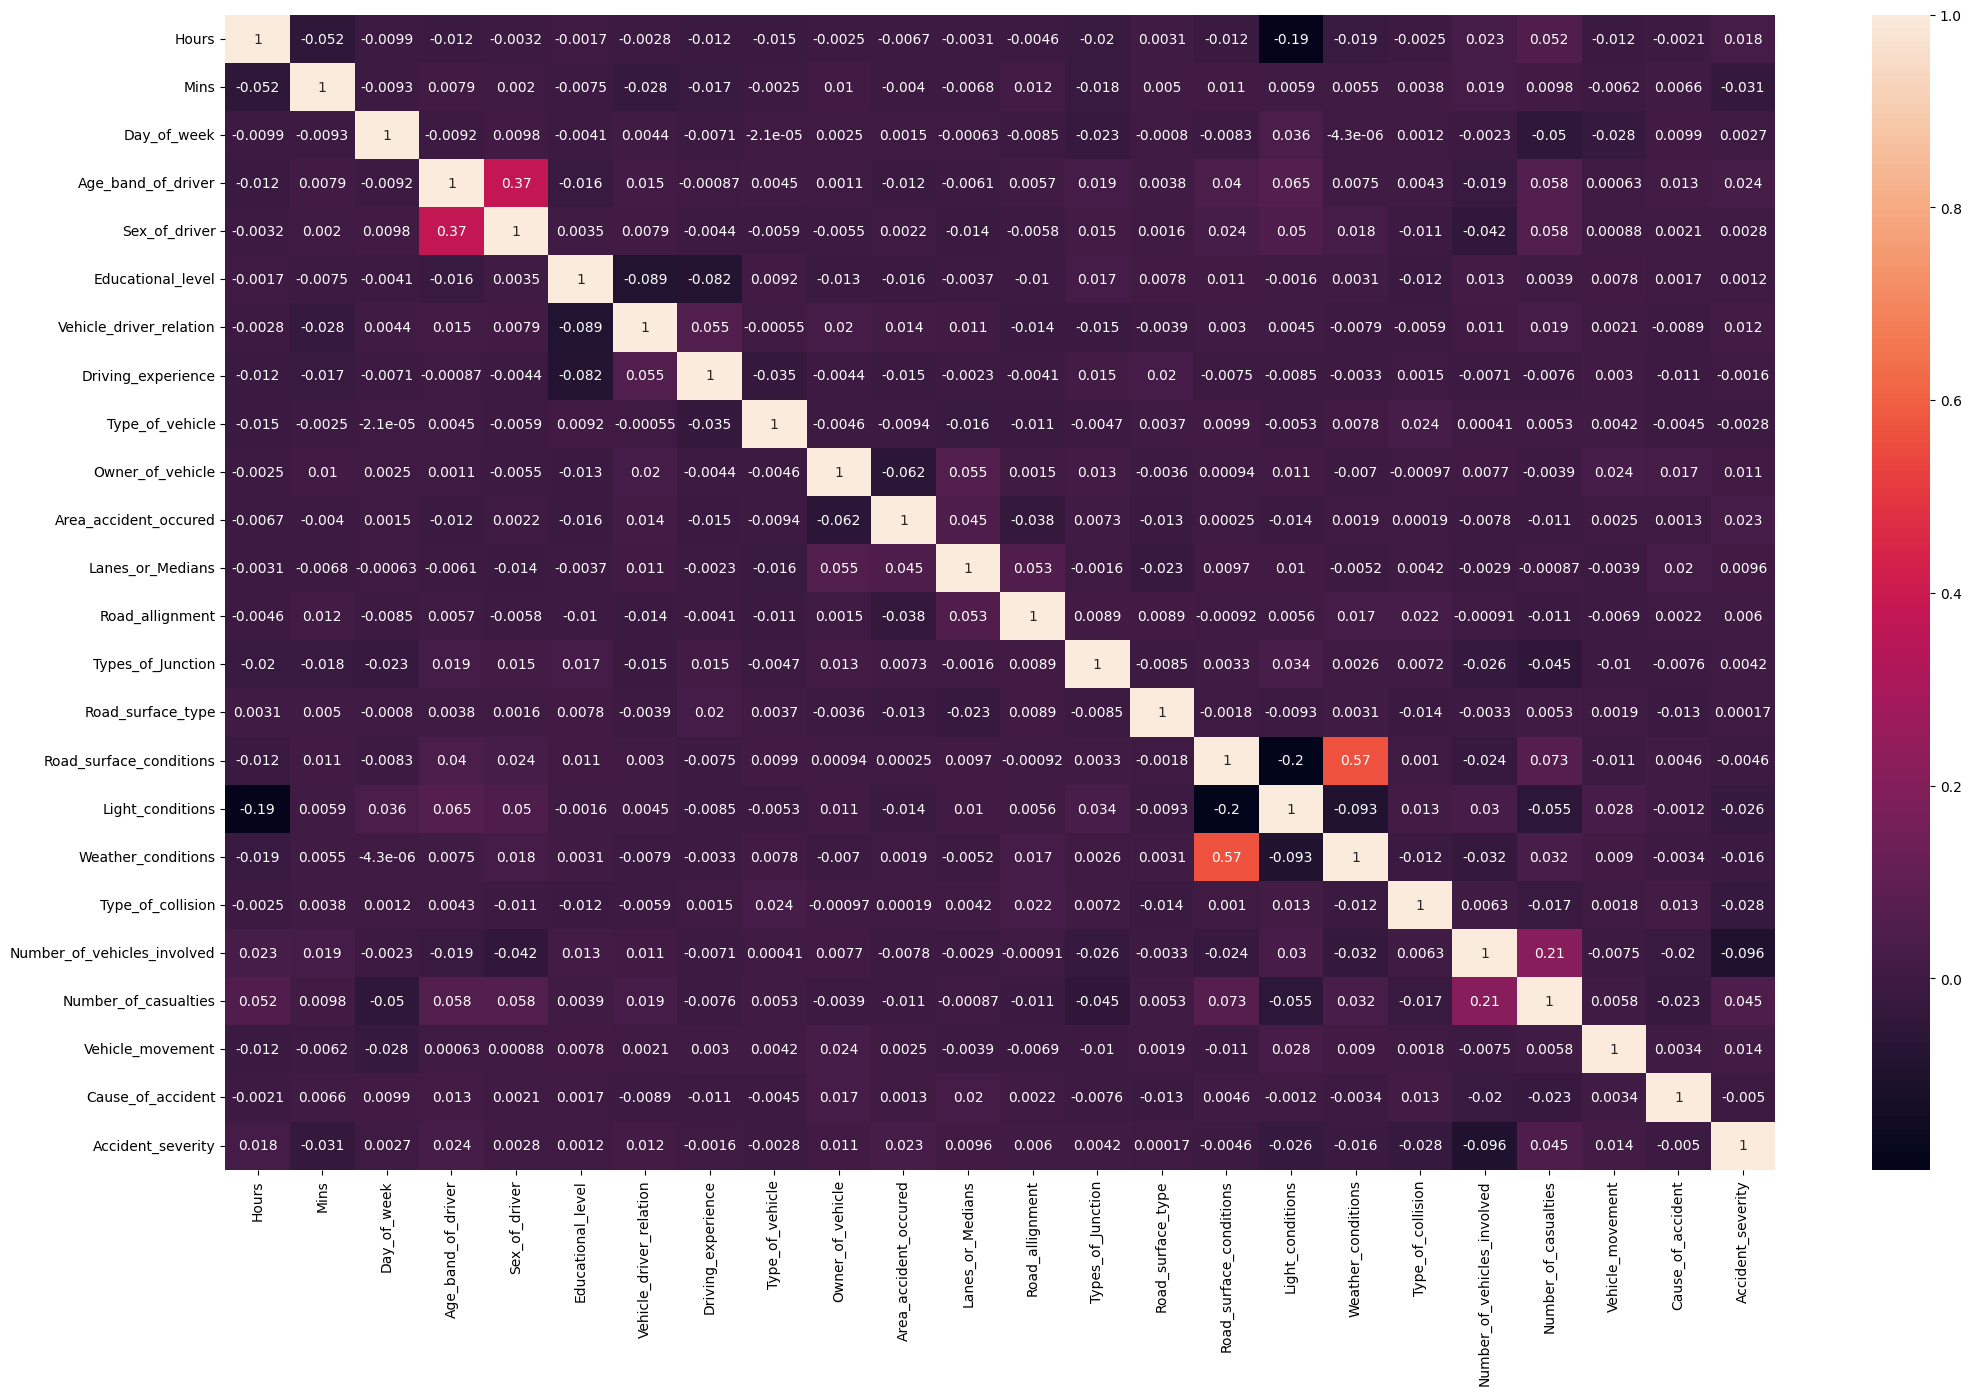

In [554]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

In [555]:
X=df.drop('Accident_severity',axis=1)
y=df['Accident_severity']

In [556]:
X.columns

Index(['Hours', 'Mins', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Cause_of_accident'],
      dtype='object')

In [557]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Hours                        12316 non-null  int32
 1   Mins                         12316 non-null  int32
 2   Day_of_week                  12316 non-null  int64
 3   Age_band_of_driver           12316 non-null  int64
 4   Sex_of_driver                12316 non-null  int64
 5   Educational_level            12316 non-null  int64
 6   Vehicle_driver_relation      12316 non-null  int64
 7   Driving_experience           12316 non-null  int64
 8   Type_of_vehicle              12316 non-null  int64
 9   Owner_of_vehicle             12316 non-null  int64
 10  Area_accident_occured        12316 non-null  int64
 11  Lanes_or_Medians             12316 non-null  int64
 12  Road_allignment              12316 non-null  int64
 13  Types_of_Junction            12316 non-null  i

In [558]:
X.head()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Cause_of_accident
0,17,2,1,1,1,0,0,2,0,3,...,1,0,0,3,2,3,2,2,2,8
1,17,2,1,2,1,4,0,5,11,3,...,1,0,0,3,2,7,2,2,2,15
2,17,2,1,1,1,4,0,2,5,3,...,1,0,0,3,2,2,2,2,2,0
3,1,6,3,1,1,4,0,4,11,0,...,6,2,0,0,2,7,2,2,2,1
4,1,6,3,1,1,4,0,3,7,3,...,6,0,0,0,2,7,2,2,2,15


In [559]:
y.head()

0    1
1    1
2    2
3    1
4    1
Name: Accident_severity, dtype: int64

In [560]:
y.value_counts()

Accident_severity
1    10415
2     1743
3      158
Name: count, dtype: int64

In [561]:
X.tail()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Cause_of_accident
12311,16,15,6,2,1,4,0,3,4,3,...,1,0,0,3,2,7,2,1,2,9
12312,18,0,3,-1,1,1,0,4,0,3,...,1,0,0,3,2,7,2,1,4,9
12313,13,55,3,3,1,4,0,4,1,3,...,1,0,0,3,2,7,1,1,4,1
12314,13,55,3,1,0,4,0,5,5,3,...,1,0,0,0,2,7,2,1,4,4
12315,13,55,3,1,1,4,0,4,7,3,...,2,0,0,0,2,7,2,1,8,1


<Axes: xlabel='Accident_severity'>

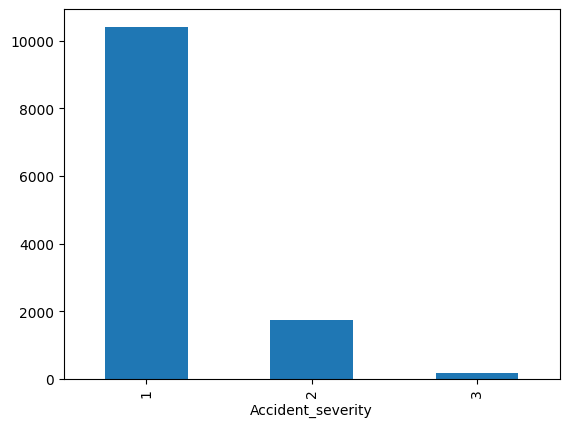

In [562]:
y.value_counts().plot(kind='bar')

In [563]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X,y=smote.fit_resample(X,y)

In [564]:
y.value_counts()

Accident_severity
1    10415
2    10415
3    10415
Name: count, dtype: int64

<Axes: xlabel='Accident_severity'>

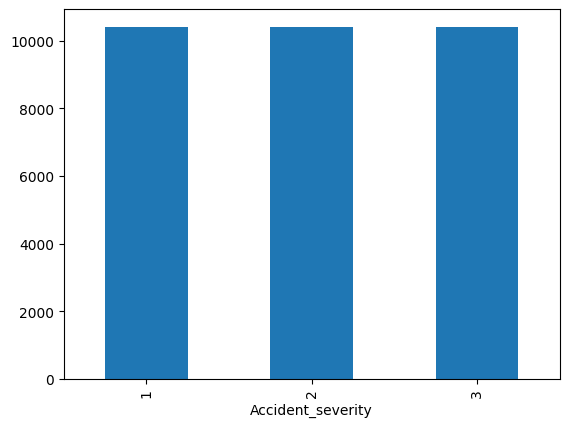

In [565]:
y.value_counts().plot(kind='bar')

In [566]:
X.tail()

,Hours,Mins,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Cause_of_accident
31240,15,4,2,2,1,2,1,2,7,2,...,6,0,3,3,2,7,2,4,3,12
31241,22,30,3,1,1,4,0,0,7,3,...,0,0,0,0,2,7,2,4,2,1
31242,11,16,3,1,1,4,0,3,9,3,...,1,0,0,3,2,2,2,5,3,0
31243,18,57,5,2,1,2,0,4,3,3,...,6,0,0,3,2,7,2,2,2,16
31244,11,10,5,1,1,4,0,3,0,2,...,6,0,0,2,2,1,2,2,2,2


In [567]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [568]:
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [569]:
models=[LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,GaussianNB,RandomForestClassifier,SVC]
print_vals=[]

for i in models:
    mod=i()
    mod.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    ac=(accuracy_score(y_test,y_pred))
    # cm=(confusion_matrix(y_test,y_pred))
    # cr=(classification_report(y_test,y_pred))
    print_vals.append({'Model':i.__name__,'Score':ac})
print(pd.DataFrame(print_vals))

C:\Users\nalla\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                    Model     Score
0      LogisticRegression  0.525684
1  DecisionTreeClassifier  0.861098
2    KNeighborsClassifier  0.832453
3              GaussianNB  0.511442
4  RandomForestClassifier  0.944791
5                     SVC  0.670187


In [570]:
rf=RandomForestClassifier()

In [571]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [572]:
accuracy_score(y_test,y_pred)

0.9431909105456873

In [573]:
import pickle
pickle.dump(encoders,open('le.pkl','wb'))
pickle.dump(rf,open('rf.pkl','wb'))

# with open('le.pkl', 'wb') as file:
#     pickle.dump(label_encoders, file)
# pickle.dump(rf,open('rf.pkl','wb'))